In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns
import time
from datetime import datetime
from pytz import timezone
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
df = pd.read_csv("Forecast.csv",parse_dates=True)

In [3]:
df.tail()

,product,date,city,sales
4795,SECF,11-01-2017,Delhi,5837
4796,SECF,12-01-2017,Delhi,7451
4797,SECF,01-01-2018,Delhi,7712
4798,SECF,02-01-2018,Delhi,31525
4799,SECF,03-01-2018,Delhi,36136


In [4]:
df['Date'] = pd.to_datetime(df['date'])

In [5]:
#df = df[df.Date < pd.to_datetime('2018-01-01')]

In [6]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [7]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [8]:
df.head()

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01


In [9]:
df.head(50)

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01
5,Mixers,09-01-2014,Mumbai,4677008,2014-09-01
6,Mixers,10-01-2014,Mumbai,4331662,2014-10-01
7,Mixers,11-01-2014,Mumbai,2184730,2014-11-01
8,Mixers,12-01-2014,Mumbai,4131878,2014-12-01
9,Mixers,01-01-2015,Mumbai,4043952,2015-01-01


In [10]:
df.set_index('Date',inplace=True)
df.head()

,product,date,city,sales
Date,,,,
2014-04-01,Mixers,04-01-2014,Mumbai,2679347
2014-05-01,Mixers,05-01-2014,Mumbai,3864612
2014-06-01,Mixers,06-01-2014,Mumbai,2932658
2014-07-01,Mixers,07-01-2014,Mumbai,3703713
2014-08-01,Mixers,08-01-2014,Mumbai,3931029


In [11]:
df.tail()

,product,date,city,sales
Date,,,,
2017-11-01,SECF,11-01-2017,Delhi,5837
2017-12-01,SECF,12-01-2017,Delhi,7451
2018-01-01,SECF,01-01-2018,Delhi,7712
2018-02-01,SECF,02-01-2018,Delhi,31525
2018-03-01,SECF,03-01-2018,Delhi,36136


In [12]:
FP_Pun1= df[(df['city'] == 'Pune') & (df['product'] == 'FoodProcessor')]

In [13]:
FP_Pun1.tail()

,product,date,city,sales
Date,,,,
2017-11-01,FoodProcessor,11-01-2017,Pune,341359
2017-12-01,FoodProcessor,12-01-2017,Pune,366596
2018-01-01,FoodProcessor,01-01-2018,Pune,564170
2018-02-01,FoodProcessor,02-01-2018,Pune,402982
2018-03-01,FoodProcessor,03-01-2018,Pune,565621


In [14]:
FP_Pun1.shape

(48, 4)

In [15]:
FP_Pun= FP_Pun1.drop('date', axis = 1)

In [16]:
FP_Pun.head()

,product,city,sales
Date,,,
2014-04-01,FoodProcessor,Pune,552815
2014-05-01,FoodProcessor,Pune,797364
2014-06-01,FoodProcessor,Pune,605079
2014-07-01,FoodProcessor,Pune,764167
2014-08-01,FoodProcessor,Pune,811068


In [17]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

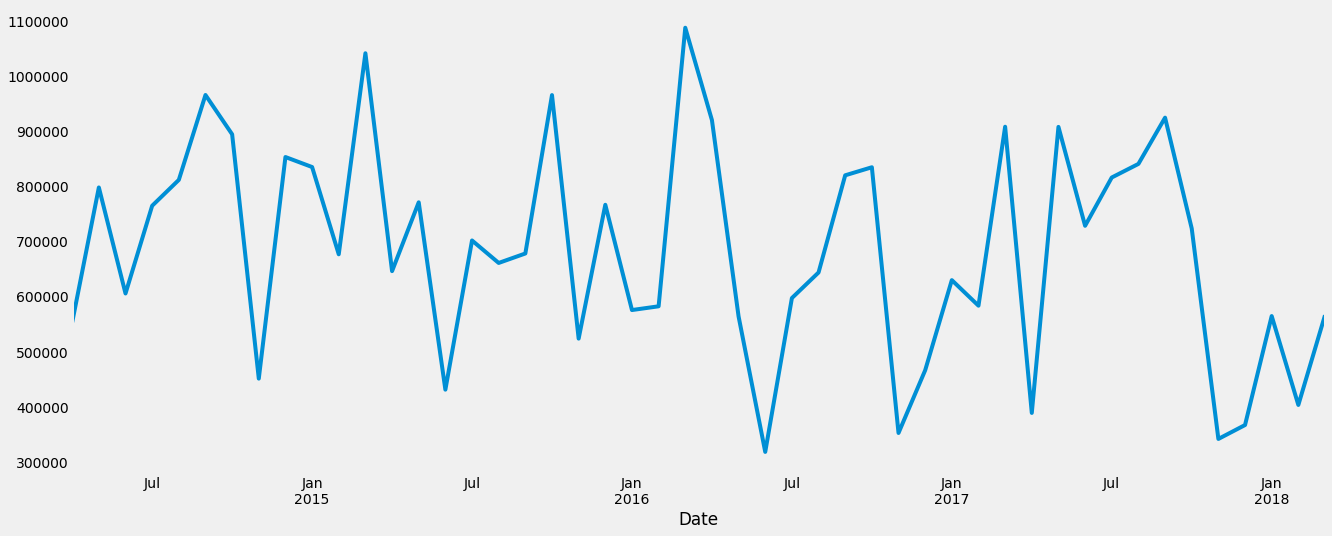

In [18]:
FP_Pun['sales'].plot()
plt.grid();

In [19]:
FP_Pun.sort_index(inplace= True)

In [20]:
FP_Pun.head()

,product,city,sales
Date,,,
2014-04-01,FoodProcessor,Pune,552815
2014-05-01,FoodProcessor,Pune,797364
2014-06-01,FoodProcessor,Pune,605079
2014-07-01,FoodProcessor,Pune,764167
2014-08-01,FoodProcessor,Pune,811068


In [21]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

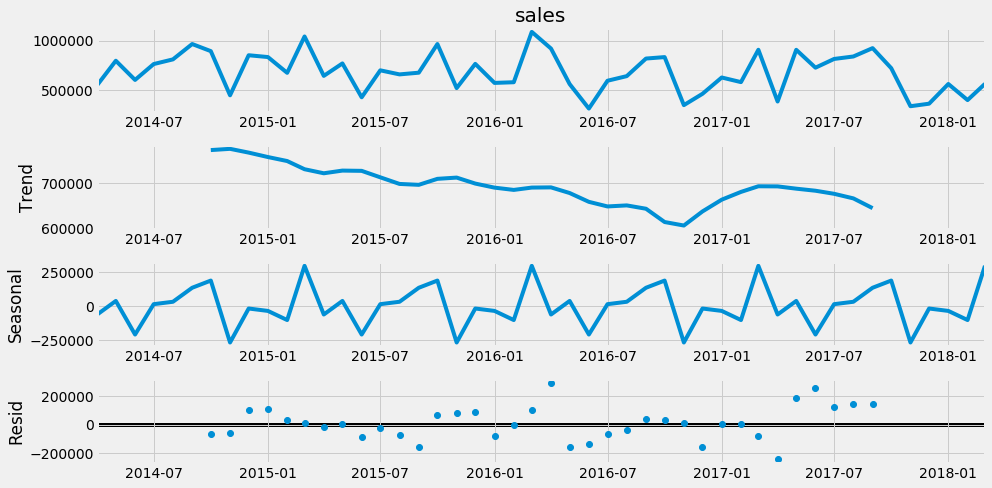

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(FP_Pun['sales'],model='additive')
decomposition.plot();

In [23]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01    774166.833333
2014-11-01    776910.666667
2014-12-01    768523.291667
2015-01-01    758635.166667
2015-02-01    749736.541667
2015-03-01    731487.583333
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01    -62455.017361
2014-05-01     37227.024306
2014-06-01   -209363.697917
2014-07-01     13455.149306
2014-08-01     31089.885417
2014-09-01    133891.996528
2014-10-01    186725.218750
2014-11-01   -267949.184028
2014-12-01    -18476.822917
2015-01-01    -36074.822917
2015-02-01   -103130.920139
2015-03-01    295061.190972
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01    -67164.052083
2014-11-01    -58198.

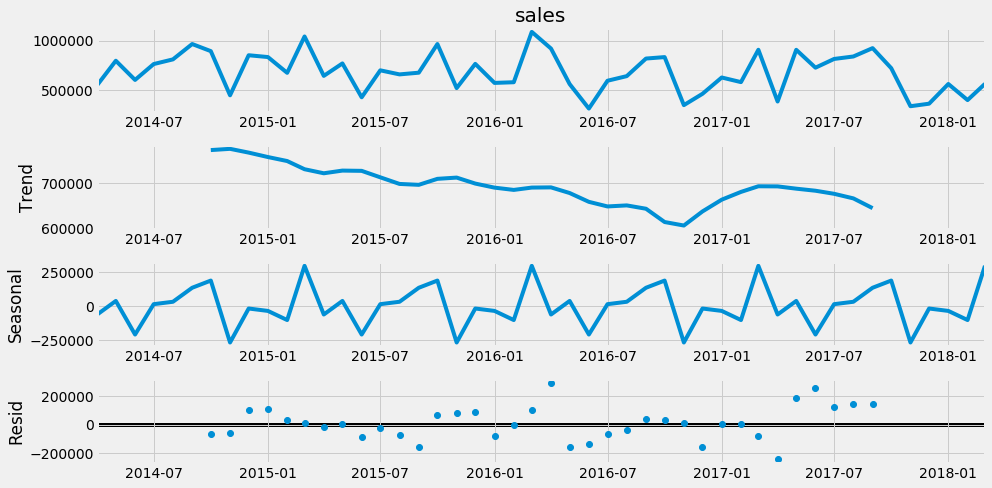

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(FP_Pun['sales'],model='Multiplicative')
decomposition.plot();

In [25]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01    774166.833333
2014-11-01    776910.666667
2014-12-01    768523.291667
2015-01-01    758635.166667
2015-02-01    749736.541667
2015-03-01    731487.583333
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01    -62455.017361
2014-05-01     37227.024306
2014-06-01   -209363.697917
2014-07-01     13455.149306
2014-08-01     31089.885417
2014-09-01    133891.996528
2014-10-01    186725.218750
2014-11-01   -267949.184028
2014-12-01    -18476.822917
2015-01-01    -36074.822917
2015-02-01   -103130.920139
2015-03-01    295061.190972
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01    -67164.052083
2014-11-01    -58198.

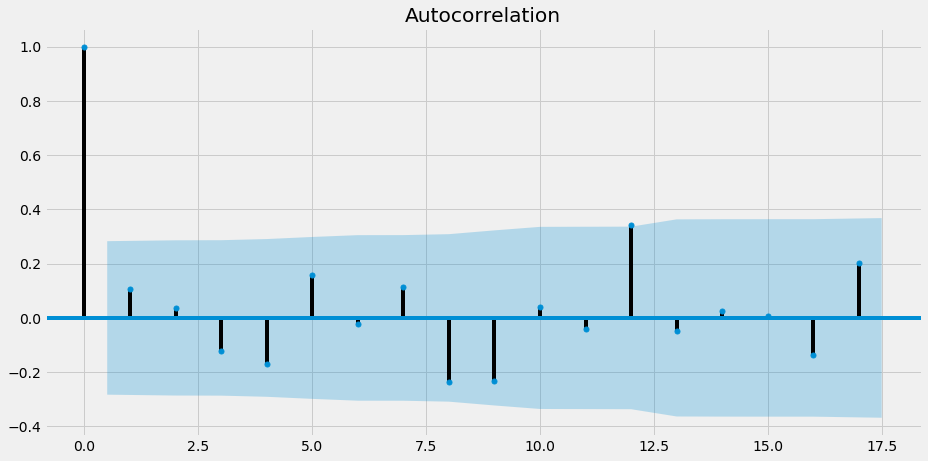

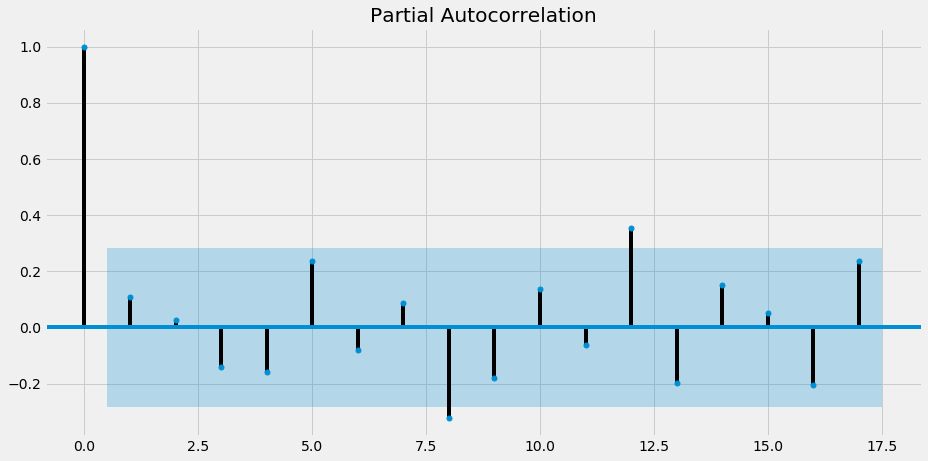

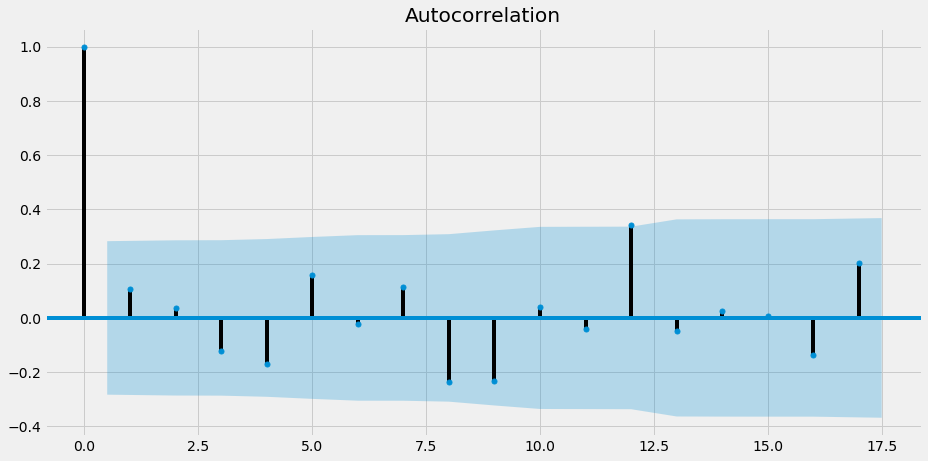

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(FP_Pun['sales'])
plot_acf(FP_Pun['sales'])

In [26]:
FP_Pun.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-04-01 to 2018-03-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  48 non-null     object
 1   city     48 non-null     object
 2   sales    48 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [27]:
train    =   FP_Pun[0:int(len(FP_Pun)*0.7)] 
test     =  FP_Pun[int(len(FP_Pun)*0.7):]

In [28]:
train.shape

(33, 3)

In [29]:
test.shape

(15, 3)

In [30]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,product,city,sales
Date,,,
2014-04-01,FoodProcessor,Pune,552815
2014-05-01,FoodProcessor,Pune,797364
2014-06-01,FoodProcessor,Pune,605079
2014-07-01,FoodProcessor,Pune,764167
2014-08-01,FoodProcessor,Pune,811068


Last few rows of Training Data


,product,city,sales
Date,,,
2016-08-01,FoodProcessor,Pune,643157
2016-09-01,FoodProcessor,Pune,819363
2016-10-01,FoodProcessor,Pune,833960
2016-11-01,FoodProcessor,Pune,352154
2016-12-01,FoodProcessor,Pune,465852


First few rows of Test Data


,product,city,sales
Date,,,
2017-01-01,FoodProcessor,Pune,629315
2017-02-01,FoodProcessor,Pune,582973
2017-03-01,FoodProcessor,Pune,907429
2017-04-01,FoodProcessor,Pune,388545
2017-05-01,FoodProcessor,Pune,907135


Last few rows of Test Data


,product,city,sales
Date,,,
2017-11-01,FoodProcessor,Pune,341359
2017-12-01,FoodProcessor,Pune,366596
2018-01-01,FoodProcessor,Pune,564170
2018-02-01,FoodProcessor,Pune,402982
2018-03-01,FoodProcessor,Pune,565621


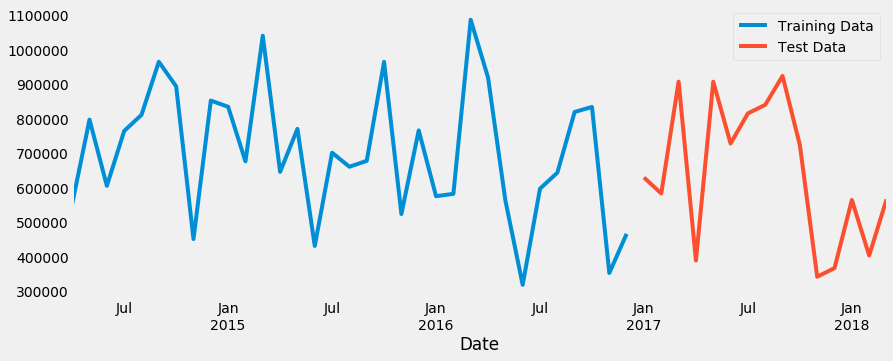

In [31]:
train['sales'].plot(figsize=(13,5), fontsize=14)
test['sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [32]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147]


In [33]:
from sklearn import metrics

Simpleaverage

In [34]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [35]:
SimpleAverage_test['mean_forecast'] = train['sales'].mean()
SimpleAverage_test.head()

,product,city,sales,mean_forecast
Date,,,,
2017-01-01,FoodProcessor,Pune,629315,701200.030303
2017-02-01,FoodProcessor,Pune,582973,701200.030303
2017-03-01,FoodProcessor,Pune,907429,701200.030303
2017-04-01,FoodProcessor,Pune,388545,701200.030303
2017-05-01,FoodProcessor,Pune,907135,701200.030303


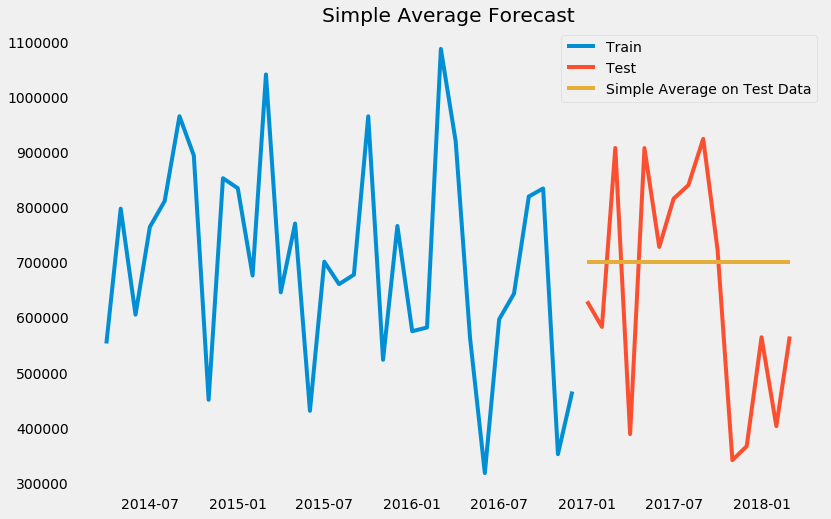

In [36]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['sales'], label='Train')
plt.plot(SimpleAverage_test['sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [37]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 208560.592


In [38]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average'])
resultsDf

,Test RMSE
Simple Average,208560.592371


In [39]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

Simple average

In [40]:
SES_train = train.copy()
SES_test = test.copy()

In [41]:
model_SES = SimpleExpSmoothing(SES_train['sales'])

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [42]:
model_SES_autofit = model_SES.fit(optimized=True)

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [43]:
model_SES_autofit.params

{'smoothing_level': 0.15465116279069768,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 552815.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [44]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,product,city,sales,predict
Date,,,,
2017-01-01,FoodProcessor,Pune,629315,622118.259215
2017-02-01,FoodProcessor,Pune,582973,622118.259215
2017-03-01,FoodProcessor,Pune,907429,622118.259215
2017-04-01,FoodProcessor,Pune,388545,622118.259215
2017-05-01,FoodProcessor,Pune,907135,622118.259215


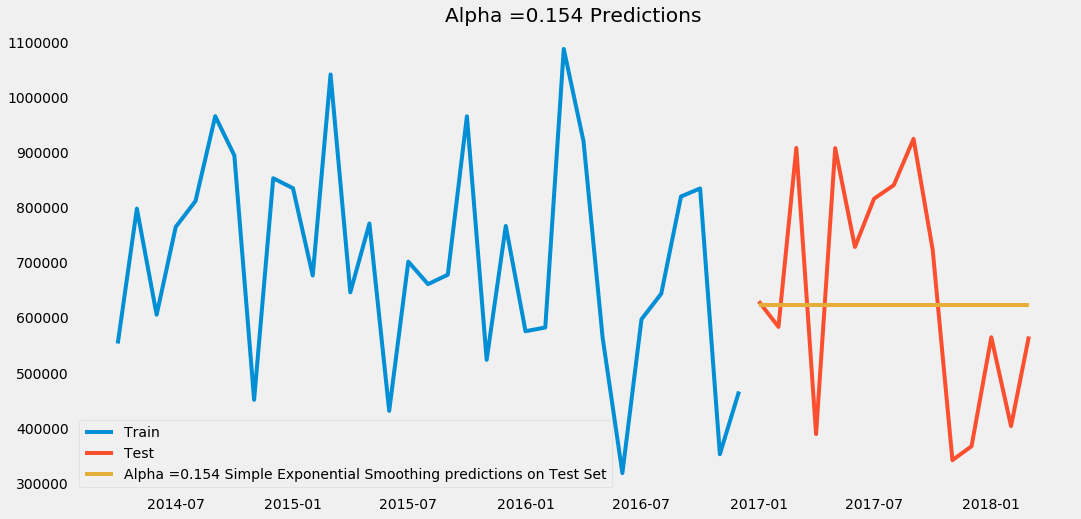

In [45]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.154 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.154 Predictions');

In [46]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['sales'],SES_test['predict'],squared=False)
print("For Alpha =0.154 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.154 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 202437.592


In [47]:
def mean_absolute_percentage_error(y_true, y_pred): 

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [48]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict'])
print('\nMAPE:',mape)


MAPE: 31.213416115682314


In [49]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1], 'Test MAPE': [mape] },index=['Alpha=0.4709,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,208560.592371,NaN
"Alpha=0.4709,SimpleExponentialSmoothing",202437.592269,31.213416


In [50]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [51]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=18)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['sales'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [52]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.1,206839.475018,201053.744954
1,0.2,206470.850989,205405.722434
2,0.3,210256.469427,215046.274800
3,0.4,215529.241505,227054.516187
4,0.5,221388.790124,240383.510771
5,0.6,227572.628796,253694.419593
6,0.7,234173.486326,265045.109854
7,0.8,241496.955252,272399.825507
8,0.9,249951.566149,274221.987716


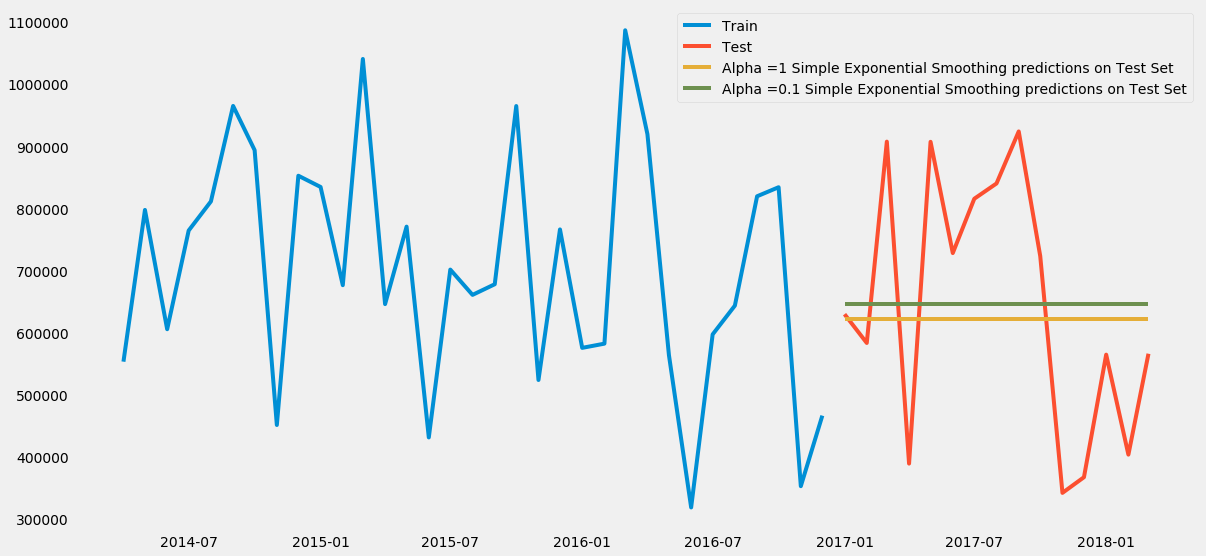

In [53]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [54]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict',0.2])
print('\nMAPE:',mape)


MAPE: 30.486289648058847


In [55]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,208560.592371,NaN
"Alpha=0.4709,SimpleExponentialSmoothing",202437.592269,31.213416
"Alpha=0.1,SimpleExponentialSmoothing",201053.744954,30.486290


Double

In [56]:
DES_train = train.copy()
DES_test = test.copy()

In [57]:
model_DES = Holt(DES_train['sales'])

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [58]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [59]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_trend = j, optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=18)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [60]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,970469.163139,307517.623839
1,0.1,0.2,680146.834516,690365.366770
2,0.1,0.3,568468.018747,267098.001976
3,0.1,0.4,498861.992690,347484.973331
4,0.1,0.5,452781.186150,322576.634857
...,...,...,...,...
95,1.0,0.6,351567.996039,523987.379660
96,1.0,0.7,370137.556402,365177.074749
97,1.0,0.8,390709.288845,241338.660854
98,1.0,0.9,413773.407406,481119.218447


In [61]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
5,0.1,0.6,420327.108757,186436.804872
97,1.0,0.8,390709.288845,241338.660854
20,0.3,0.1,376958.019500,253526.502245
11,0.2,0.2,385834.168976,258822.122431
12,0.2,0.3,333516.000980,260201.082870


In [62]:
mape = mean_absolute_percentage_error(DES_test['sales'],DES_test['predict',0.1,0.6])
print('\nMAPE:',mape)


MAPE: 29.75514522410198


In [63]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,208560.592371,NaN
"Alpha=0.4709,SimpleExponentialSmoothing",202437.592269,31.213416
"Alpha=0.1,SimpleExponentialSmoothing",201053.744954,30.486290
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",186436.804872,29.755145


In [64]:
TES_train = train.copy()
TES_test = test.copy()

In [65]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train['sales'],trend='additive',seasonal='Multiplicative',initialization_method='estimated')

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [66]:
model_TES_autofit = model_TES.fit()

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [67]:
model_TES_autofit.params

{'smoothing_level': 0.040357142857142855,
 'smoothing_trend': 0.040357142857142855,
 'smoothing_seasonal': 0.0001,
 'damping_trend': nan,
 'initial_level': 785727.833333333,
 'initial_trend': -7373.581060606011,
 'initial_seasons': array([0.9156015 , 1.08363053, 0.60632253, 1.00700597, 0.96849212,
        0.996491  , 1.18284946, 0.59447808, 1.13658024, 1.12689336,
        0.92397924, 1.45767597]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [68]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,product,city,sales,auto_predict
Date,,,,
2017-01-01,FoodProcessor,Pune,629315,674453.628488
2017-02-01,FoodProcessor,Pune,582973,547510.621856
2017-03-01,FoodProcessor,Pune,907429,855081.613530
2017-04-01,FoodProcessor,Pune,388545,531648.532703
2017-05-01,FoodProcessor,Pune,907135,622720.573401


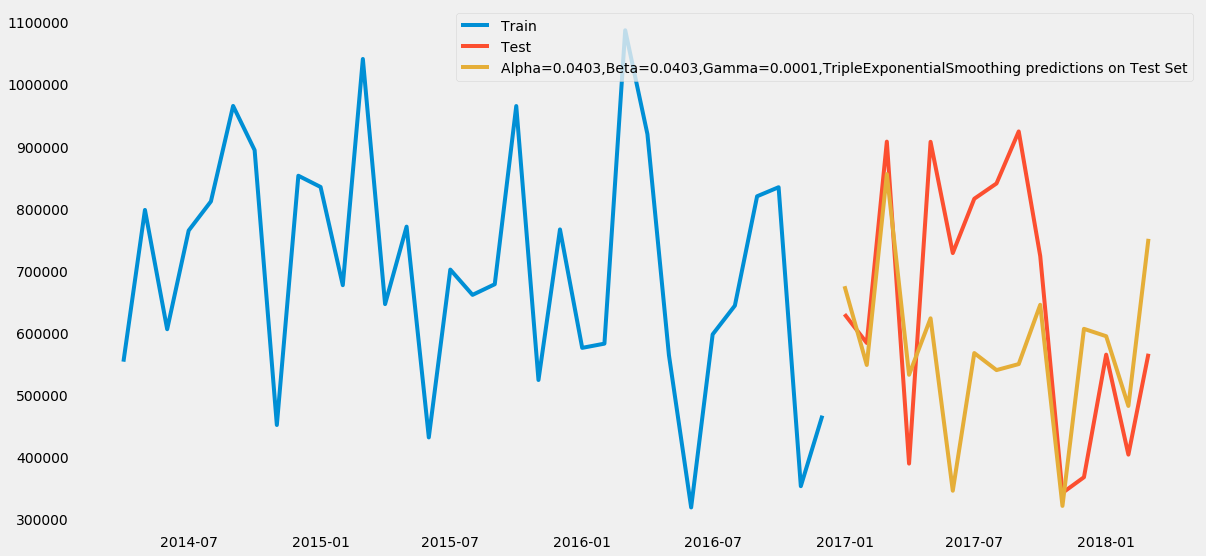

In [69]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['sales'], label='Train')
plt.plot(TES_test['sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.0403,Beta=0.0403,Gamma=0.0001,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [71]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['sales'],TES_test['auto_predict'],squared=False)
print("Forlabel='Alpha=0.0403,Beta=0.0403,Gamma=0.0001', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Forlabel='Alpha=0.0403,Beta=0.0403,Gamma=0.0001', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 208502.808


In [72]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['auto_predict'])
print('\nMAPE:',mape)


MAPE: 25.76076260045414


In [73]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1], 'Test MAPE' : [mape]}
                           ,index=['Alpha=0.0403,Beta=0.0403,Gamma=0.0001,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,208560.592371,NaN
"Alpha=0.4709,SimpleExponentialSmoothing",202437.592269,31.213416
"Alpha=0.1,SimpleExponentialSmoothing",201053.744954,30.486290
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",186436.804872,29.755145
"Alpha=0.0403,Beta=0.0403,Gamma=0.0001,TripleExponentialSmoothing",208502.807788,25.760763


In [74]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [75]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=18)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [76]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.1,0.1,0.1,1.187468e+05,2.036823e+05
1,0.1,0.1,0.2,1.195320e+05,2.055959e+05
2,0.1,0.1,0.3,1.205844e+05,2.094352e+05
3,0.1,0.1,0.4,1.218444e+05,2.147574e+05
4,0.1,0.1,0.5,1.232838e+05,2.211532e+05
...,...,...,...,...,...
995,1.0,1.0,0.6,7.186259e+05,4.708030e+06
996,1.0,1.0,0.7,7.932182e+06,1.735380e+07
997,1.0,1.0,0.8,1.384883e+06,8.894676e+06
998,1.0,1.0,0.9,1.626955e+06,1.381587e+07


In [77]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
192,0.2,1.0,0.3,163059.861606,187948.344226
193,0.2,1.0,0.4,165894.465757,201271.335178
0,0.1,0.1,0.1,118746.798078,203682.297738
183,0.2,0.9,0.4,161677.045039,204908.175199
1,0.1,0.1,0.2,119532.034937,205595.875475


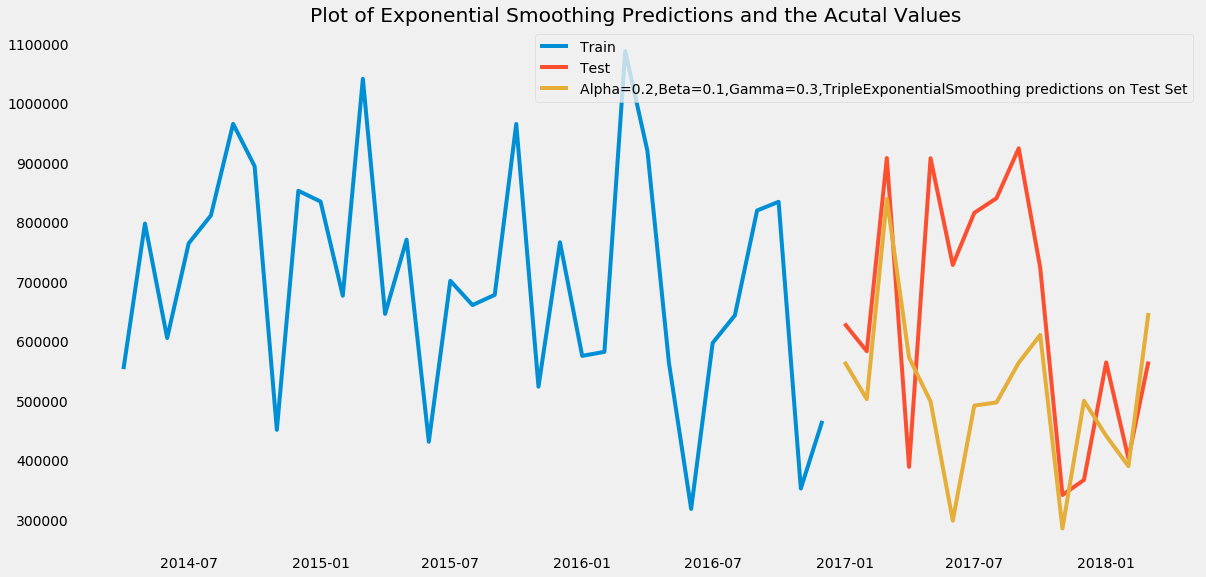

In [79]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')


plt.plot(TES_test['predict', 0.2000000000000000, 0.1000000000000000, 0.4], label='Alpha=0.2,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [80]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['predict',0.2,0.1,0.4])
print('\nMAPE:',mape)


MAPE: 27.36602939441361


In [81]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.2,Beta=0.1,Gamma=0.4,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
Simple Average,208560.592371,NaN
"Alpha=0.4709,SimpleExponentialSmoothing",202437.592269,31.213416
"Alpha=0.1,SimpleExponentialSmoothing",201053.744954,30.486290
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",186436.804872,29.755145
"Alpha=0.0403,Beta=0.0403,Gamma=0.0001,TripleExponentialSmoothing",208502.807788,25.760763
"Alpha=0.2,Beta=0.1,Gamma=0.4,TripleExponentialSmoothing",187948.344226,27.366029


In [82]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE,Test MAPE
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",186436.804872,29.755145
"Alpha=0.2,Beta=0.1,Gamma=0.4,TripleExponentialSmoothing",187948.344226,27.366029
"Alpha=0.1,SimpleExponentialSmoothing",201053.744954,30.486290
"Alpha=0.4709,SimpleExponentialSmoothing",202437.592269,31.213416
"Alpha=0.0403,Beta=0.0403,Gamma=0.0001,TripleExponentialSmoothing",208502.807788,25.760763
Simple Average,208560.592371,NaN


In [83]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

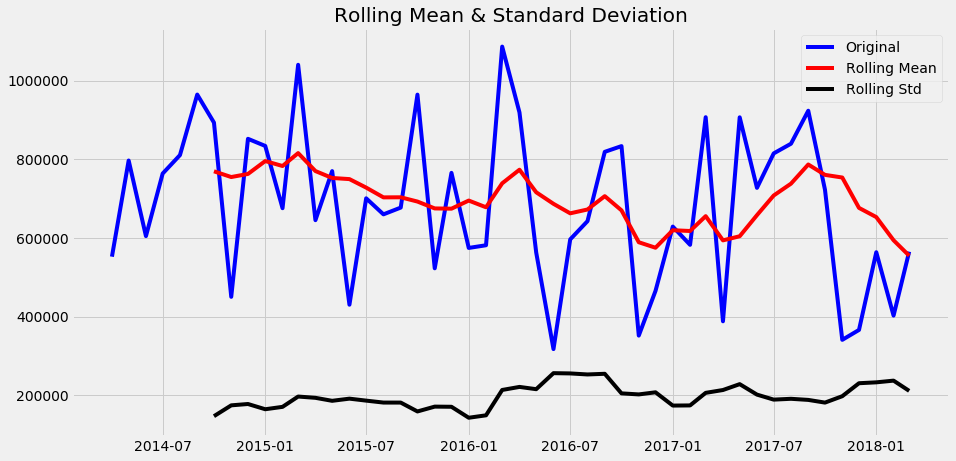

Results of Dickey-Fuller Test:
Test Statistic                -6.027566e+00
p-value                        1.443668e-07
#Lags Used                     0.000000e+00
Number of Observations Used    4.700000e+01
Critical Value (1%)           -3.577848e+00
Critical Value (5%)           -2.925338e+00
Critical Value (10%)          -2.600774e+00
dtype: float64 



In [84]:
test_stationarity(FP_Pun['sales'])

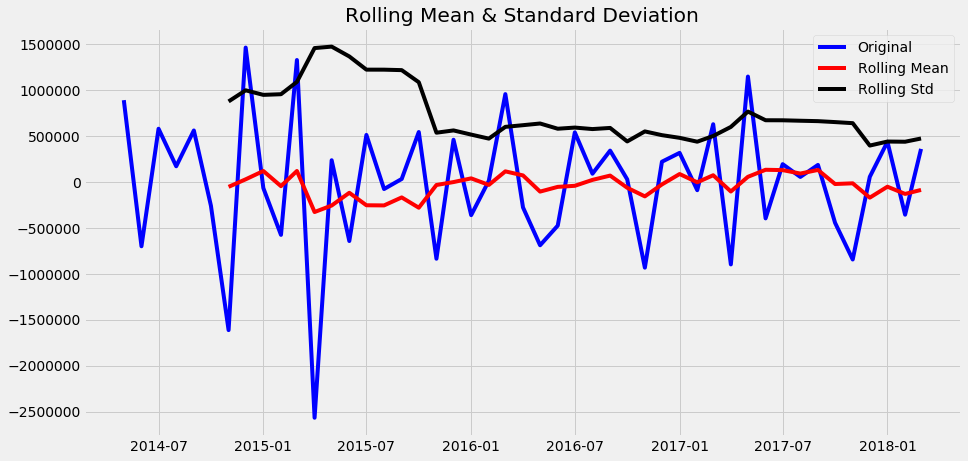

Results of Dickey-Fuller Test:
Test Statistic                 -5.581121
p-value                         0.000001
#Lags Used                      3.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64 



In [99]:
#test_stationarity(FP_Mum['sales'].diff().dropna())

In [242]:
train =train[~train.isin([np.nan, np.inf, -np.inf]).any(1)]

In [243]:
test.dropna(inplace=True)

In [244]:
test = test.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [125]:
from statsmodels.tsa.stattools import adfuller

In [85]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(0,1)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 0, 0)
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (0, 0, 3)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (1, 0, 3)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)
Model: (2, 0, 3)
Model: (3, 0, 0)
Model: (3, 0, 1)
Model: (3, 0, 2)
Model: (3, 0, 3)


In [86]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [87]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 0, 0) - AIC:983.1181164900388
ARIMA(0, 0, 1) - AIC:901.8310490818923
ARIMA(0, 0, 2) - AIC:902.5790806316522
ARIMA(0, 0, 3) - AIC:904.3538283863893
ARIMA(1, 0, 0) - AIC:901.7098026436256
ARIMA(1, 0, 1) - AIC:902.152128466155
ARIMA(1, 0, 2) - AIC:903.6991827939545
ARIMA(1, 0, 3) - AIC:906.2566485050844
ARIMA(2, 0, 0) - AIC:902.936326608841
ARIMA(2, 0, 1) - AIC:903.972968448451
ARIMA(2, 0, 2) - AIC:903.6113821753671
ARIMA(2, 0, 3) - AIC:903.6456483671238
ARIMA(3, 0, 0) - AIC:903.4898629247594
ARIMA(3, 0, 1) - AIC:905.1807808346146
ARIMA(3, 0, 2) - AIC:901.2571639604026
ARIMA(3, 0, 3) - AIC:900.5869681971657


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [88]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
15,"(3, 0, 3)",900.586968
14,"(3, 0, 2)",901.257164
4,"(1, 0, 0)",901.709803
1,"(0, 0, 1)",901.831049
5,"(1, 0, 1)",902.152128


In [89]:
auto_ARIMA = ARIMA(train['sales'], order=(3,0,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   33
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -442.293
Date:                Sat, 21 Aug 2021   AIC                            900.587
Time:                        12:15:59   BIC                            912.559
Sample:                    04-01-2014   HQIC                           904.615
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.012e+05   2.43e+04     28.889      0.000    6.54e+05    7.49e+05
ar.L1          0.2125      0.340      0.626      0.531      -0.453       0.878
ar.L2         -0.0928      0.294     -0.316      0.7

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


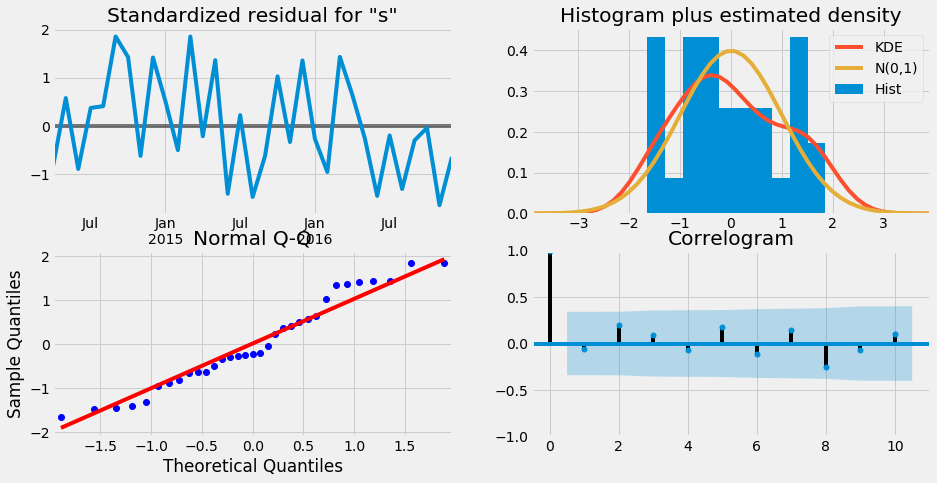

In [90]:
results_auto_ARIMA.plot_diagnostics();

In [91]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [92]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [93]:
rmse = mean_squared_error(test['sales'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 207246.64971419796 
MAPE: 35.63352311131201


In [94]:
resultsDf_8_4 = pd.DataFrame({'Test RMSE': [resultsDf_8_3.sort_values(by=['Test RMSE']).values[0][1]],'Test MAPE':[mape]}
                           ,index=['ARIMA(3,0,3)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_4])
resultsDf

,Test RMSE,Test MAPE
Simple Average,208560.592371,NaN
"Alpha=0.4709,SimpleExponentialSmoothing",202437.592269,31.213416
"Alpha=0.1,SimpleExponentialSmoothing",201053.744954,30.486290
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",186436.804872,29.755145
"Alpha=0.0403,Beta=0.0403,Gamma=0.0001,TripleExponentialSmoothing",208502.807788,25.760763
"Alpha=0.2,Beta=0.1,Gamma=0.4,TripleExponentialSmoothing",187948.344226,27.366029
"ARIMA(3,0,3)",27.366029,35.633523


In [95]:
import itertools
p = q = range(0, 4)
d= range(0,1)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 0, 3)(0, 0, 3, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (1, 0, 3)(1, 0, 3, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)
Model: (2, 0, 3)(2, 0, 3, 12)
Model: (3, 0, 0)(3, 0, 0, 12)
Model: (3, 0, 1)(3, 0, 1, 12)
Model: (3, 0, 2)(3, 0, 2, 12)
Model: (3, 0, 3)(3, 0, 3, 12)


In [96]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [97]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:956.9664739661182
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:602.2166638143765
SARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:217.10981640446693
SARIMA(0, 0, 0)x(0, 0, 3, 12)12 - AIC:8.0
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:561.7878686561326
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:539.7036740202573


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:219.10981734280978
SARIMA(0, 0, 0)x(1, 0, 3, 12)12 - AIC:10.0
SARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:247.88685729733814
SARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:245.38600066516057


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:221.10977599898024
SARIMA(0, 0, 0)x(2, 0, 3, 12)12 - AIC:12.0
SARIMA(0, 0, 0)x(3, 0, 0, 12)12 - AIC:8.0
SARIMA(0, 0, 0)x(3, 0, 1, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 0)x(3, 0, 2, 12)12 - AIC:12.0
SARIMA(0, 0, 0)x(3, 0, 3, 12)12 - AIC:14.0
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:910.3565547841175
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:555.5646293760974
SARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:209.79106754479835


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 1)x(0, 0, 3, 12)12 - AIC:10.0
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:611.8631410592607
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:556.2197094890187


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:211.7636648357365
SARIMA(0, 0, 1)x(1, 0, 3, 12)12 - AIC:12.0
SARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:267.4438034755535
SARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:269.4437570589266


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(0, 0, 1)x(2, 0, 2, 12)12 - AIC:213.7617211594748
SARIMA(0, 0, 1)x(2, 0, 3, 12)12 - AIC:14.0
SARIMA(0, 0, 1)x(3, 0, 0, 12)12 - AIC:10.0
SARIMA(0, 0, 1)x(3, 0, 1, 12)12 - AIC:12.0
SARIMA(0, 0, 1)x(3, 0, 2, 12)12 - AIC:14.0
SARIMA(0, 0, 1)x(3, 0, 3, 12)12 - AIC:16.0

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base


SARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:879.1431187231486
SARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:527.9627817347806


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:182.9014171732638
SARIMA(0, 0, 2)x(0, 0, 3, 12)12 - AIC:12.0
SARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:613.7875940629848
SARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:529.3303441479463


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:184.93748081686527
SARIMA(0, 0, 2)x(1, 0, 3, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:269.38890293959844
SARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:271.38129872709374


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:186.9368146332595
SARIMA(0, 0, 2)x(2, 0, 3, 12)12 - AIC:16.0
SARIMA(0, 0, 2)x(3, 0, 0, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 2)x(3, 0, 1, 12)12 - AIC:14.0
SARIMA(0, 0, 2)x(3, 0, 2, 12)12 - AIC:16.0
SARIMA(0, 0, 2)x(3, 0, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 3)x(0, 0, 0, 12)12 - AIC:847.5417942174583
SARIMA(0, 0, 3)x(0, 0, 1, 12)12 - AIC:499.45239585092656
SARIMA(0, 0, 3)x(0, 0, 2, 12)12 - AIC:155.60558225033154


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 3)x(0, 0, 3, 12)12 - AIC:14.0
SARIMA(0, 0, 3)x(1, 0, 0, 12)12 - AIC:613.8340405226036
SARIMA(0, 0, 3)x(1, 0, 1, 12)12 - AIC:500.7536297403302


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 3)x(1, 0, 2, 12)12 - AIC:157.60556838448935
SARIMA(0, 0, 3)x(1, 0, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 3)x(2, 0, 0, 12)12 - AIC:270.54389368664397
SARIMA(0, 0, 3)x(2, 0, 1, 12)12 - AIC:272.5616392831199


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 3)x(2, 0, 2, 12)12 - AIC:159.63430851195005
SARIMA(0, 0, 3)x(2, 0, 3, 12)12 - AIC:18.0
SARIMA(0, 0, 3)x(3, 0, 0, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 0, 3)x(3, 0, 1, 12)12 - AIC:16.0
SARIMA(0, 0, 3)x(3, 0, 2, 12)12 - AIC:18.0
SARIMA(0, 0, 3)x(3, 0, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:892.6280349595307
SARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:551.3909887635897
SARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:223.38317401186788
SARIMA(1, 0, 0)x(0, 0, 3, 12)12 - AIC:10.0
SARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:547.2010534242189


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:549.1977096713581
SARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:225.3831727144024
SARIMA(1, 0, 0)x(1, 0, 3, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:223.3831379813837
SARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:225.38314084202412
SARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:227.38314653801652


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 0)x(2, 0, 3, 12)12 - AIC:14.0
SARIMA(1, 0, 0)x(3, 0, 0, 12)12 - AIC:10.0
SARIMA(1, 0, 0)x(3, 0, 1, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 0)x(3, 0, 2, 12)12 - AIC:14.0
SARIMA(1, 0, 0)x(3, 0, 3, 12)12 - AIC:16.0
SARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:853.9640104986347


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:521.4338895081245
SARIMA(1, 0, 1)x(0, 0, 2, 12)12 - AIC:196.76431300756454
SARIMA(1, 0, 1)x(0, 0, 3, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:546.5244935808821
SARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:521.5400886910115


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(1, 0, 2, 12)12 - AIC:199.16391795551957
SARIMA(1, 0, 1)x(1, 0, 3, 12)12 - AIC:14.0
SARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:223.91122100850475


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:225.91116495301662


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 0, 1)x(2, 0, 2, 12)12 - AIC:200.89046384671357
SARIMA(1, 0, 1)x(2, 0, 3, 12)12 - AIC:16.0
SARIMA(1, 0, 1)x(3, 0, 0, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 1)x(3, 0, 1, 12)12 - AIC:14.0
SARIMA(1, 0, 1)x(3, 0, 2, 12)12 - AIC:16.0
SARIMA(1, 0, 1)x(3, 0, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:828.5750791481228
SARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:492.37135323346985


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:170.41975323813134
SARIMA(1, 0, 2)x(0, 0, 3, 12)12 - AIC:14.0
SARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:544.102577933096


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:493.2402740773292
SARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:172.83551358590586
SARIMA(1, 0, 2)x(1, 0, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\mod

SARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:223.9512875005834


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:225.6855957181541
SARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:174.84954604063537
SARIMA(1, 0, 2)x(2, 0, 3, 12)12 - AIC:18.0
SARIMA(1, 0, 2)x(3, 0, 0, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 2)x(3, 0, 1, 12)12 - AIC:16.0
SARIMA(1, 0, 2)x(3, 0, 2, 12)12 - AIC:18.0
SARIMA(1, 0, 2)x(3, 0, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 3)x(0, 0, 0, 12)12 - AIC:801.7950652893708
SARIMA(1, 0, 3)x(0, 0, 1, 12)12 - AIC:463.5277518413411


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 0, 3)x(0, 0, 2, 12)12 - AIC:147.3934300725868
SARIMA(1, 0, 3)x(0, 0, 3, 12)12 - AIC:16.0
SARIMA(1, 0, 3)x(1, 0, 0, 12)12 - AIC:545.4700068666896


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 0, 3)x(1, 0, 1, 12)12 - AIC:466.0761419140126


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 0, 3)x(1, 0, 2, 12)12 - AIC:148.2058875063233
SARIMA(1, 0, 3)x(1, 0, 3, 12)12 - AIC:18.0
SARIMA(1, 0, 3)x(2, 0, 0, 12)12 - AIC:226.34410848572264


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 3)x(2, 0, 1, 12)12 - AIC:234.5699737681507


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 0, 3)x(2, 0, 2, 12)12 - AIC:153.19604759947526
SARIMA(1, 0, 3)x(2, 0, 3, 12)12 - AIC:20.0
SARIMA(1, 0, 3)x(3, 0, 0, 12)12 - AIC:16.0
SARIMA(1, 0, 3)x(3, 0, 1, 12)12 - AIC:18.0
SARIMA(1, 0, 3)x(3, 0, 2, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 0, 3)x(3, 0, 3, 12)12 - AIC:22.0
SARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:861.0272802840602
SARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:551.6151232761698
SARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:223.40512220395613


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(2, 0, 0)x(0, 0, 3, 12)12 - AIC:12.0
SARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:518.572381828672
SARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:520.5647695676855
SARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:225.40512114778568


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(2, 0, 0)x(1, 0, 3, 12)12 - AIC:14.0
SARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:196.82124621727672
SARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:198.82124899007195


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:200.82125646191832
SARIMA(2, 0, 0)x(2, 0, 3, 12)12 - AIC:16.0
SARIMA(2, 0, 0)x(3, 0, 0, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(2, 0, 0)x(3, 0, 1, 12)12 - AIC:14.0
SARIMA(2, 0, 0)x(3, 0, 2, 12)12 - AIC:16.0
SARIMA(2, 0, 0)x(3, 0, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:850.3464759340114
SARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:523.1161646265988


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:199.026019162528
SARIMA(2, 0, 1)x(0, 0, 3, 12)12 - AIC:14.0
SARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:520.1631315818242


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:524.5406326599704


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:200.49841891131905
SARIMA(2, 0, 1)x(1, 0, 3, 12)12 - AIC:16.0
SARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:198.60469949742068
SARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:200.60471340264468


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\mod

SARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:202.47568919287914
SARIMA(2, 0, 1)x(2, 0, 3, 12)12 - AIC:18.0
SARIMA(2, 0, 1)x(3, 0, 0, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(2, 0, 1)x(3, 0, 1, 12)12 - AIC:16.0
SARIMA(2, 0, 1)x(3, 0, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(3, 0, 3, 12)12 - AIC:20.0
SARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:821.8366662673631


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:495.8021784791939


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:176.57285397743954
SARIMA(2, 0, 2)x(0, 0, 3, 12)12 - AIC:16.0
SARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:519.9805138712645


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:496.4628434181957


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:173.97805547051703
SARIMA(2, 0, 2)x(1, 0, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:200.05188192376332


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:204.1126007377768


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:179.4664778338453
SARIMA(2, 0, 2)x(2, 0, 3, 12)12 - AIC:20.0
SARIMA(2, 0, 2)x(3, 0, 0, 12)12 - AIC:16.0
SARIMA(2, 0, 2)x(3, 0, 1, 12)12 - AIC:18.0
SARIMA(2, 0, 2)x(3, 0, 2, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(2, 0, 2)x(3, 0, 3, 12)12 - AIC:22.0
SARIMA(2, 0, 3)x(0, 0, 0, 12)12 - AIC:795.5945058448589


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 0, 3)x(0, 0, 1, 12)12 - AIC:467.4462796408109
SARIMA(2, 0, 3)x(0, 0, 2, 12)12 - AIC:148.37803025885677
SARIMA(2, 0, 3)x(0, 0, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 3)x(1, 0, 0, 12)12 - AIC:518.96596177794


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 0, 3)x(1, 0, 1, 12)12 - AIC:468.93021200802866


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 0, 3)x(1, 0, 2, 12)12 - AIC:151.07186882925492
SARIMA(2, 0, 3)x(1, 0, 3, 12)12 - AIC:20.0
SARIMA(2, 0, 3)x(2, 0, 0, 12)12 - AIC:201.63152319769154


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 3)x(2, 0, 1, 12)12 - AIC:203.18497043696945


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 3)x(2, 0, 2, 12)12 - AIC:153.46752177047756
SARIMA(2, 0, 3)x(2, 0, 3, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 3)x(3, 0, 0, 12)12 - AIC:18.0
SARIMA(2, 0, 3)x(3, 0, 1, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 3)x(3, 0, 2, 12)12 - AIC:22.0
SARIMA(2, 0, 3)x(3, 0, 3, 12)12 - AIC:24.0
SARIMA(3, 0, 0)x(0, 0, 0, 12)12 - AIC:834.6658975119892
SARIMA(3, 0, 0)x(0, 0, 1, 12)12 - AIC:553.1866293457842


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(3, 0, 0)x(0, 0, 2, 12)12 - AIC:225.09031932208154
SARIMA(3, 0, 0)x(0, 0, 3, 12)12 - AIC:14.0
SARIMA(3, 0, 0)x(1, 0, 0, 12)12 - AIC:492.43413291873117


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(3, 0, 0)x(1, 0, 1, 12)12 - AIC:494.409001192289
SARIMA(3, 0, 0)x(1, 0, 2, 12)12 - AIC:227.09032027144818
SARIMA(3, 0, 0)x(1, 0, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 0)x(2, 0, 0, 12)12 - AIC:171.72897859148782
SARIMA(3, 0, 0)x(2, 0, 1, 12)12 - AIC:173.7289878027787


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 0)x(2, 0, 2, 12)12 - AIC:175.7289845080819
SARIMA(3, 0, 0)x(2, 0, 3, 12)12 - AIC:18.0
SARIMA(3, 0, 0)x(3, 0, 0, 12)12 - AIC:14.0

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



SARIMA(3, 0, 0)x(3, 0, 1, 12)12 - AIC:16.0
SARIMA(3, 0, 0)x(3, 0, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(3, 0, 0)x(3, 0, 3, 12)12 - AIC:20.0
SARIMA(3, 0, 1)x(0, 0, 0, 12)12 - AIC:825.4879138378626


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 1)x(0, 0, 1, 12)12 - AIC:527.4871752028403
SARIMA(3, 0, 1)x(0, 0, 2, 12)12 - AIC:200.46527246944058


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 1)x(0, 0, 3, 12)12 - AIC:16.0
SARIMA(3, 0, 1)x(1, 0, 0, 12)12 - AIC:494.68216242956606
SARIMA(3, 0, 1)x(1, 0, 1, 12)12 - AIC:496.6507513917347


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(3, 0, 1)x(1, 0, 2, 12)12 - AIC:202.4639340385075
SARIMA(3, 0, 1)x(1, 0, 3, 12)12 - AIC:18.0
SARIMA(3, 0, 1)x(2, 0, 0, 12)12 - AIC:173.7086338754669
SARIMA(3, 0, 1)x(2, 0, 1, 12)12 - AIC:175.70552069471057


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\mod

SARIMA(3, 0, 1)x(2, 0, 2, 12)12 - AIC:177.49145994305175
SARIMA(3, 0, 1)x(2, 0, 3, 12)12 - AIC:20.0
SARIMA(3, 0, 1)x(3, 0, 0, 12)12 - AIC:16.0
SARIMA(3, 0, 1)x(3, 0, 1, 12)12 - AIC:18.0
SARIMA(3, 0, 1)x(3, 0, 2, 12)12 - AIC:20.0

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



SARIMA(3, 0, 1)x(3, 0, 3, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\mod

SARIMA(3, 0, 2)x(0, 0, 0, 12)12 - AIC:834.917423644282


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 2)x(0, 0, 1, 12)12 - AIC:495.8862293201178
SARIMA(3, 0, 2)x(0, 0, 2, 12)12 - AIC:174.06728811476063
SARIMA(3, 0, 2)x(0, 0, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 2)x(1, 0, 0, 12)12 - AIC:494.53874041336746


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 2)x(1, 0, 1, 12)12 - AIC:497.25277624241494


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(3, 0, 2)x(1, 0, 2, 12)12 - AIC:176.15711649881771
SARIMA(3, 0, 2)x(1, 0, 3, 12)12 - AIC:20.0
SARIMA(3, 0, 2)x(2, 0, 0, 12)12 - AIC:174.87875099574055


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(3, 0, 2)x(2, 0, 1, 12)12 - AIC:176.6974686602806
SARIMA(3, 0, 2)x(2, 0, 2, 12)12 - AIC:178.0512758895742
SARIMA(3, 0, 2)x(2, 0, 3, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 2)x(3, 0, 0, 12)12 - AIC:18.0
SARIMA(3, 0, 2)x(3, 0, 1, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 2)x(3, 0, 2, 12)12 - AIC:22.0
SARIMA(3, 0, 2)x(3, 0, 3, 12)12 - AIC:24.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 3)x(0, 0, 0, 12)12 - AIC:803.4861553265008


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 0, 3)x(0, 0, 1, 12)12 - AIC:470.1391561110432


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(3, 0, 3)x(0, 0, 2, 12)12 - AIC:151.39240046056062
SARIMA(3, 0, 3)x(0, 0, 3, 12)12 - AIC:20.0
SARIMA(3, 0, 3)x(1, 0, 0, 12)12 - AIC:492.3447548255273


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 3)x(1, 0, 1, 12)12 - AIC:472.68261984676064


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 3)x(1, 0, 2, 12)12 - AIC:152.86153140579285
SARIMA(3, 0, 3)x(1, 0, 3, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\mod

SARIMA(3, 0, 3)x(2, 0, 0, 12)12 - AIC:177.698316490583
SARIMA(3, 0, 3)x(2, 0, 1, 12)12 - AIC:179.0122291387885


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 3)x(2, 0, 2, 12)12 - AIC:155.06759105315513
SARIMA(3, 0, 3)x(2, 0, 3, 12)12 - AIC:24.0
SARIMA(3, 0, 3)x(3, 0, 0, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(3, 0, 3)x(3, 0, 1, 12)12 - AIC:22.0
SARIMA(3, 0, 3)x(3, 0, 2, 12)12 - AIC:24.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 0, 3)x(3, 0, 3, 12)12 - AIC:26.0


In [98]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
3,"(0, 0, 0)","(0, 0, 3, 12)",8.0
12,"(0, 0, 0)","(3, 0, 0, 12)",8.0
67,"(1, 0, 0)","(0, 0, 3, 12)",10.0
28,"(0, 0, 1)","(3, 0, 0, 12)",10.0
7,"(0, 0, 0)","(1, 0, 3, 12)",10.0


In [99]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['sales'],
                                order=(0,0,0),
                                seasonal_order=(0,0,3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            sales   No. Observations:                   33
Model:             SARIMAX(0, 0, [1, 2, 3], 12)   Log Likelihood                   0.000
Date:                          Sat, 21 Aug 2021   AIC                              8.000
Time:                                  12:17:40   BIC                                nan
Sample:                              04-01-2014   HQIC                               nan
                                   - 12-01-2016                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12            0         -0        nan        nan           0           0
ma.S.L24            0         -0        nan        

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [100]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [101]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-01-01,0.0,181550.408955,-355832.262931,355832.262931
2017-02-01,0.0,181550.408955,-355832.262931,355832.262931
2017-03-01,0.0,181550.408955,-355832.262931,355832.262931
2017-04-01,0.0,181550.408955,-355832.262931,355832.262931
2017-05-01,0.0,181547.654878,-355826.865039,355826.865039


In [102]:
rmse = mean_squared_error(test['sales'],predicted_auto_SARIMA.predicted_mean,squared=True)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 457413259516.26666 
MAPE: 100.0


In [103]:
resultsDf_8_5 = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape]}
                           ,index=['SARIMA(0,0,0)(0,0,3)12'])

resultsDf = pd.concat([resultsDf, resultsDf_8_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,2.085606e+05,NaN
"Alpha=0.4709,SimpleExponentialSmoothing",2.024376e+05,31.213416
"Alpha=0.1,SimpleExponentialSmoothing",2.010537e+05,30.486290
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",1.864368e+05,29.755145
"Alpha=0.0403,Beta=0.0403,Gamma=0.0001,TripleExponentialSmoothing",2.085028e+05,25.760763
"Alpha=0.2,Beta=0.1,Gamma=0.4,TripleExponentialSmoothing",1.879483e+05,27.366029
"ARIMA(3,0,3)",2.736603e+01,35.633523
"SARIMA(0,0,0)(0,0,3)12",4.574133e+11,100.000000


In [104]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Test MAPE
"ARIMA(3,0,3)",2.736603e+01,35.633523
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",1.864368e+05,29.755145
"Alpha=0.2,Beta=0.1,Gamma=0.4,TripleExponentialSmoothing",1.879483e+05,27.366029
"Alpha=0.1,SimpleExponentialSmoothing",2.010537e+05,30.486290
"Alpha=0.4709,SimpleExponentialSmoothing",2.024376e+05,31.213416
"Alpha=0.0403,Beta=0.0403,Gamma=0.0001,TripleExponentialSmoothing",2.085028e+05,25.760763
Simple Average,2.085606e+05,NaN
"SARIMA(0,0,0)(0,0,3)12",4.574133e+11,100.000000


In [105]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

In [106]:
FP_Pun.head()

,product,city,sales
Date,,,
2014-04-01,FoodProcessor,Pune,552815
2014-05-01,FoodProcessor,Pune,797364
2014-06-01,FoodProcessor,Pune,605079
2014-07-01,FoodProcessor,Pune,764167
2014-08-01,FoodProcessor,Pune,811068


In [107]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(FP_Pun1['date'])
df_prophet['y'] =FP_Pun1['sales']
df_prophet.tail()

,ds,y
Date,,
2017-11-01,2017-11-01,341359
2017-12-01,2017-12-01,366596
2018-01-01,2018-01-01,564170
2018-02-01,2018-02-01,402982
2018-03-01,2018-03-01,565621


In [108]:
df_prophet.shape

(48, 2)

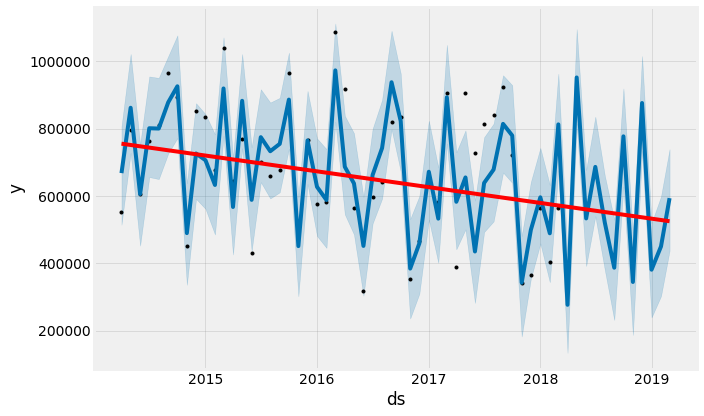

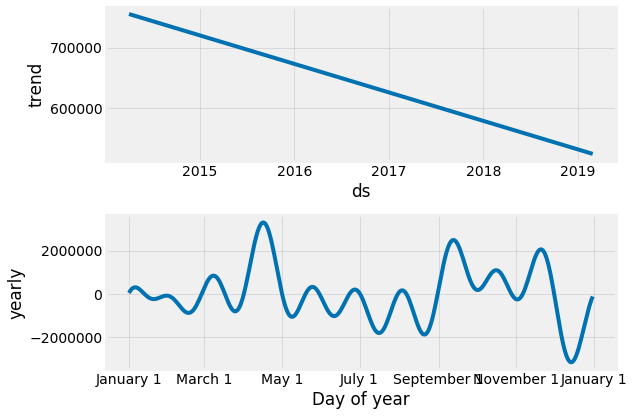

In [109]:
prophet=Prophet(seasonality_mode='additive',weekly_seasonality=False,daily_seasonality=False)
prophet.fit(df_prophet[df_prophet['ds'] <= pd.to_datetime('2018-03-01')])
future = prophet.make_future_dataframe(periods=12, freq= 'M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

In [110]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,755639.506312,514921.908398,8.067013e+05,755639.506312,755639.506312,-87462.146870,-87462.146870,-87462.146870,-87462.146870,-87462.146870,-87462.146870,0.0,0.0,0.0,668177.359441
1,2014-05-01,751786.479501,728038.925874,1.022142e+06,751786.479501,751786.479501,110556.522292,110556.522292,110556.522292,110556.522292,110556.522292,110556.522292,0.0,0.0,0.0,862343.001794
2,2014-06-01,747805.018458,452550.941170,7.531459e+05,747805.018458,747805.018458,-141767.731997,-141767.731997,-141767.731997,-141767.731997,-141767.731997,-141767.731997,0.0,0.0,0.0,606037.286461
3,2014-07-01,743951.991641,656525.400623,9.553360e+05,743951.991641,743951.991641,57533.314548,57533.314548,57533.314548,57533.314548,57533.314548,57533.314548,0.0,0.0,0.0,801485.306189
4,2014-08-01,739970.530603,650459.773122,9.510568e+05,739970.530603,739970.530603,60625.728486,60625.728486,60625.728486,60625.728486,60625.728486,60625.728486,0.0,0.0,0.0,800596.259090
5,2014-09-01,735989.069568,726692.040448,1.015643e+06,735989.069568,735989.069568,142480.606891,142480.606891,142480.606891,142480.606891,142480.606891,142480.606891,0.0,0.0,0.0,878469.676459
6,2014-10-01,732136.042760,772420.526782,1.077498e+06,732136.042760,732136.042760,194082.470684,194082.470684,194082.470684,194082.470684,194082.470684,194082.470684,0.0,0.0,0.0,926218.513444
7,2014-11-01,728154.581732,336230.104254,6.381826e+05,728154.581732,728154.581732,-238256.374285,-238256.374285,-238256.374285,-238256.374285,-238256.374285,-238256.374285,0.0,0.0,0.0,489898.207446
8,2014-12-01,724301.554921,591551.226317,8.758060e+05,724301.554921,724301.554921,2179.754306,2179.754306,2179.754306,2179.754306,2179.754306,2179.754306,0.0,0.0,0.0,726481.309227
9,2015-01-01,720320.093884,562007.743942,8.431392e+05,720320.093884,720320.093884,-13840.131163,-13840.131163,-13840.131163,-13840.131163,-13840.131163,-13840.131163,0.0,0.0,0.0,706479.962721


In [111]:
rmse = mean_squared_error(test['sales'],forecast.tail(15)['yhat'])
print(rmse)

51789120613.718765


In [112]:
resultsDf_8_6 = pd.DataFrame({'Test RMSE': [rmse],}
                           ,index=['Prophet'])

resultsDf = pd.concat([resultsDf, resultsDf_8_6])
resultsDf

,Test RMSE,Test MAPE
Simple Average,2.085606e+05,NaN
"Alpha=0.4709,SimpleExponentialSmoothing",2.024376e+05,31.213416
"Alpha=0.1,SimpleExponentialSmoothing",2.010537e+05,30.486290
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",1.864368e+05,29.755145
"Alpha=0.0403,Beta=0.0403,Gamma=0.0001,TripleExponentialSmoothing",2.085028e+05,25.760763
"Alpha=0.2,Beta=0.1,Gamma=0.4,TripleExponentialSmoothing",1.879483e+05,27.366029
"ARIMA(3,0,3)",2.736603e+01,35.633523
"SARIMA(0,0,0)(0,0,3)12",4.574133e+11,100.000000
Prophet,5.178912e+10,NaN


In [113]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Test MAPE
"ARIMA(3,0,3)",2.736603e+01,35.633523
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",1.864368e+05,29.755145
"Alpha=0.2,Beta=0.1,Gamma=0.4,TripleExponentialSmoothing",1.879483e+05,27.366029
"Alpha=0.1,SimpleExponentialSmoothing",2.010537e+05,30.486290
"Alpha=0.4709,SimpleExponentialSmoothing",2.024376e+05,31.213416
"Alpha=0.0403,Beta=0.0403,Gamma=0.0001,TripleExponentialSmoothing",2.085028e+05,25.760763
Simple Average,2.085606e+05,NaN
Prophet,5.178912e+10,NaN
"SARIMA(0,0,0)(0,0,3)12",4.574133e+11,100.000000


In [114]:
import fbprophet

In [115]:
m = fbprophet.Prophet()

In [116]:
m.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [117]:
future = m.make_future_dataframe(periods=365)

In [118]:
forecast = m.predict(future)

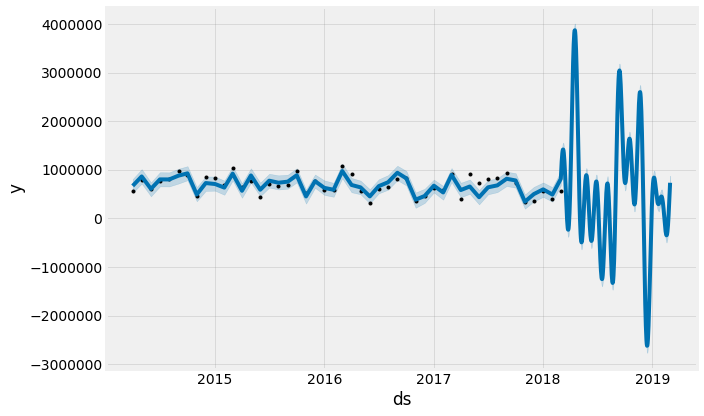

In [119]:
m.plot(forecast);

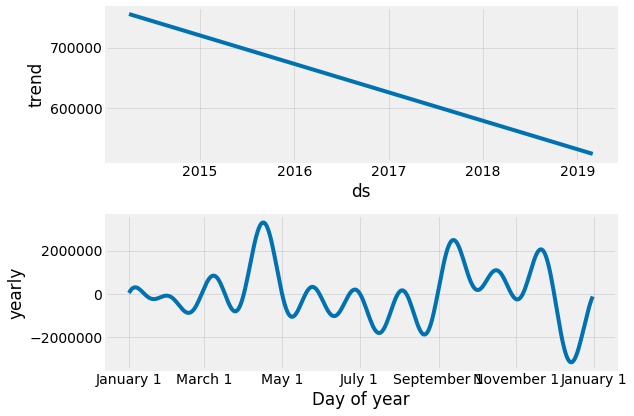

In [120]:
m.plot_components(forecast);

In [121]:
df_prophet.head()

,ds,y
Date,,
2014-04-01,2014-04-01,552815
2014-05-01,2014-05-01,797364
2014-06-01,2014-06-01,605079
2014-07-01,2014-07-01,764167
2014-08-01,2014-08-01,811068


In [122]:
future.tail()

,ds
408,2019-02-25
409,2019-02-26
410,2019-02-27
411,2019-02-28
412,2019-03-01


In [123]:
predict=m.predict(future)

In [124]:
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,755639.506312,523497.422529,8.212803e+05,755639.506312,755639.506312,-87462.146870,-87462.146870,-87462.146870,-87462.146870,-87462.146870,-87462.146870,0.0,0.0,0.0,668177.359441
1,2014-05-01,751786.479501,718293.140650,1.021278e+06,751786.479501,751786.479501,110556.522292,110556.522292,110556.522292,110556.522292,110556.522292,110556.522292,0.0,0.0,0.0,862343.001794
2,2014-06-01,747805.018458,452076.349704,7.527226e+05,747805.018458,747805.018458,-141767.731997,-141767.731997,-141767.731997,-141767.731997,-141767.731997,-141767.731997,0.0,0.0,0.0,606037.286461
3,2014-07-01,743951.991641,657445.241527,9.653686e+05,743951.991641,743951.991641,57533.314548,57533.314548,57533.314548,57533.314548,57533.314548,57533.314548,0.0,0.0,0.0,801485.306189
4,2014-08-01,739970.530603,651885.428325,9.421039e+05,739970.530603,739970.530603,60625.728486,60625.728486,60625.728486,60625.728486,60625.728486,60625.728486,0.0,0.0,0.0,800596.259090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2019-02-25,525613.804281,47737.543815,3.371896e+05,525613.797604,525613.811342,-339261.018845,-339261.018845,-339261.018845,-339261.018845,-339261.018845,-339261.018845,0.0,0.0,0.0,186352.785437
409,2019-02-26,525485.370053,175182.211941,4.668540e+05,525485.363362,525485.377144,-208202.022431,-208202.022431,-208202.022431,-208202.022431,-208202.022431,-208202.022431,0.0,0.0,0.0,317283.347622
410,2019-02-27,525356.935824,308073.449557,6.091453e+05,525356.929118,525356.942936,-71069.689109,-71069.689109,-71069.689109,-71069.689109,-71069.689109,-71069.689109,0.0,0.0,0.0,454287.246716
411,2019-02-28,525228.501596,447803.630492,7.305878e+05,525228.494854,525228.508726,68586.043833,68586.043833,68586.043833,68586.043833,68586.043833,68586.043833,0.0,0.0,0.0,593814.545428


In [125]:
predict[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-04-01,668177.359441,523497.422529,8.212803e+05
1,2014-05-01,862343.001794,718293.140650,1.021278e+06
2,2014-06-01,606037.286461,452076.349704,7.527226e+05
3,2014-07-01,801485.306189,657445.241527,9.653686e+05
4,2014-08-01,800596.259090,651885.428325,9.421039e+05


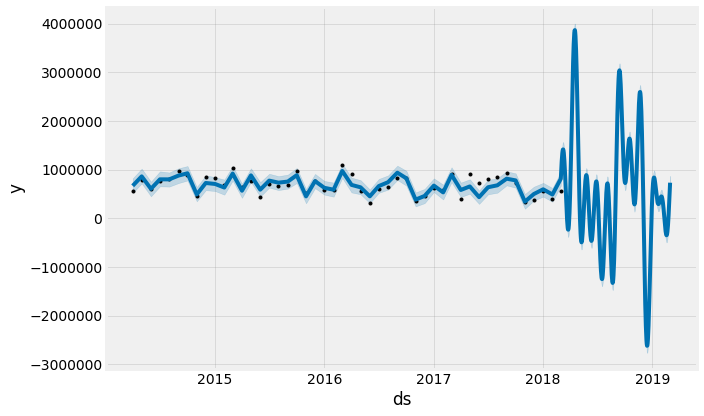

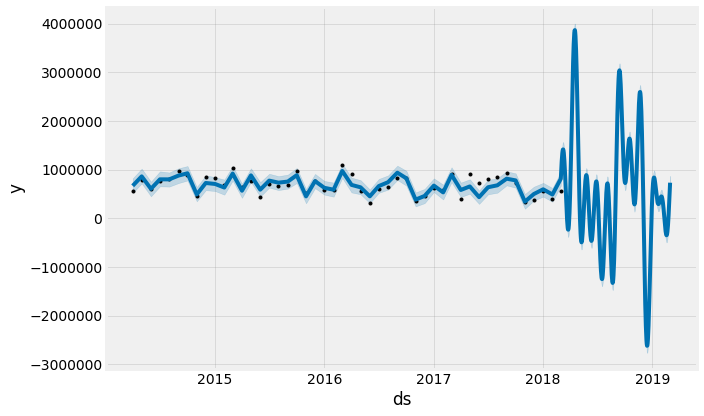

In [126]:
m.plot(predict)

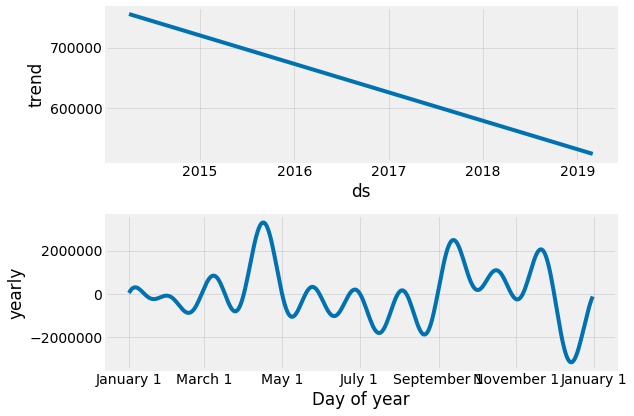

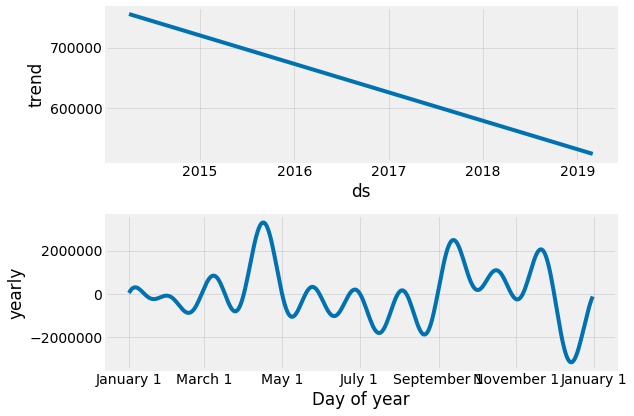

In [127]:
m.plot_components(predict)

In [128]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 2 forecasts with cutoffs between 2016-09-02 00:00:00 and 2017-03-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [129]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-10-01,756059.764774,679117.321544,831442.285640,833960,2016-09-02
1,2016-11-01,203635.153404,130744.110963,282275.000612,352154,2016-09-02
2,2016-12-01,754751.691602,681106.067897,829877.797387,465852,2016-09-02
3,2017-01-01,899757.239107,818316.286032,971011.212251,629315,2016-09-02
4,2017-02-01,199787.359081,126109.993370,275854.951059,582973,2016-09-02


In [130]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,3.420810e+10,184954.308607,163797.770671,0.368026,0.368026,0.0
1,60 days,4.220280e+10,205433.193144,199107.076356,0.532193,0.532193,0.0
2,61 days,8.415946e+10,290102.503008,265479.895991,0.421668,0.421668,0.0
3,90 days,1.148621e+11,338913.048226,335670.318494,0.520873,0.520873,0.0
4,92 days,1.378315e+11,371256.652597,363652.932223,0.611255,0.611255,0.0


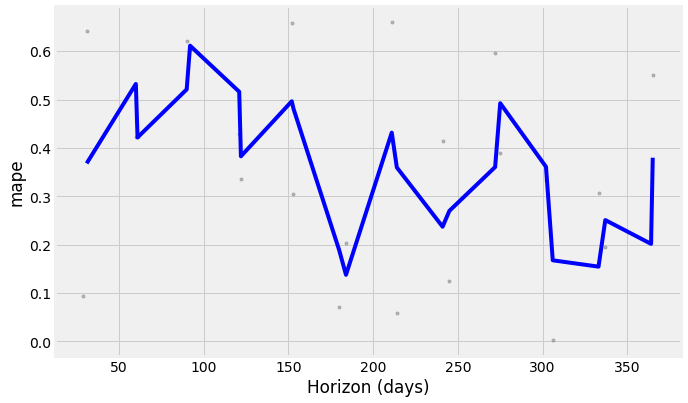

In [131]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [133]:
import statsmodels.api as sm 
arma_mod30 = sm.tsa.ARIMA(FP_Pun['sales'], (3,0,3)).fit()

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


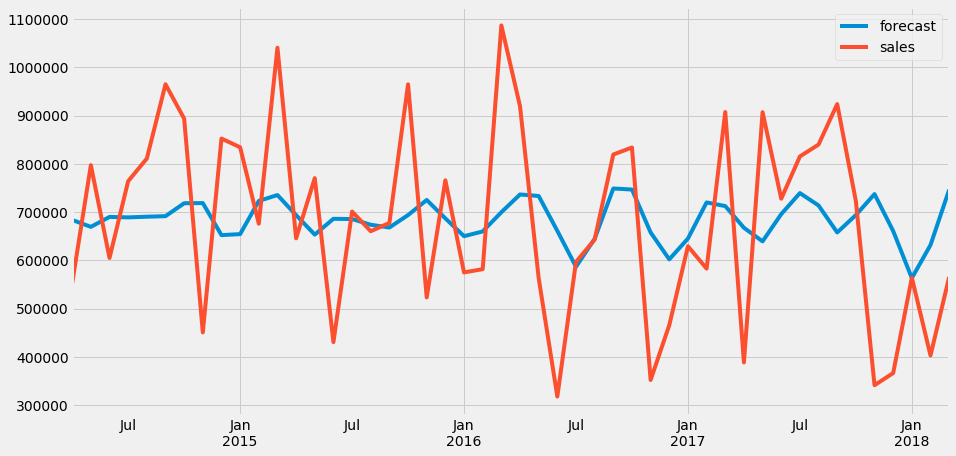

In [134]:
arma_mod30.plot_predict(dynamic=False)
plt.show()

In [135]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(FP_Pun.sales, order=(3,0,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  sales   No. Observations:                   48
Model:                     ARMA(3, 3)   Log Likelihood                -651.218
Method:                       css-mle   S.D. of innovations         183864.783
Date:                Sat, 21 Aug 2021   AIC                           1318.436
Time:                        12:20:03   BIC                           1333.406
Sample:                    04-01-2014   HQIC                          1324.093
                         - 03-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.839e+05   3.05e+04     22.389      0.000    6.24e+05    7.44e+05
ar.L1.sales    -0.1929        nan        nan        nan         nan         nan
ar.L2.sales    -0.7296        nan        nan    

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [137]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = FP_Pun.sales[:33]
test = FP_Pun.sales[33:]

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


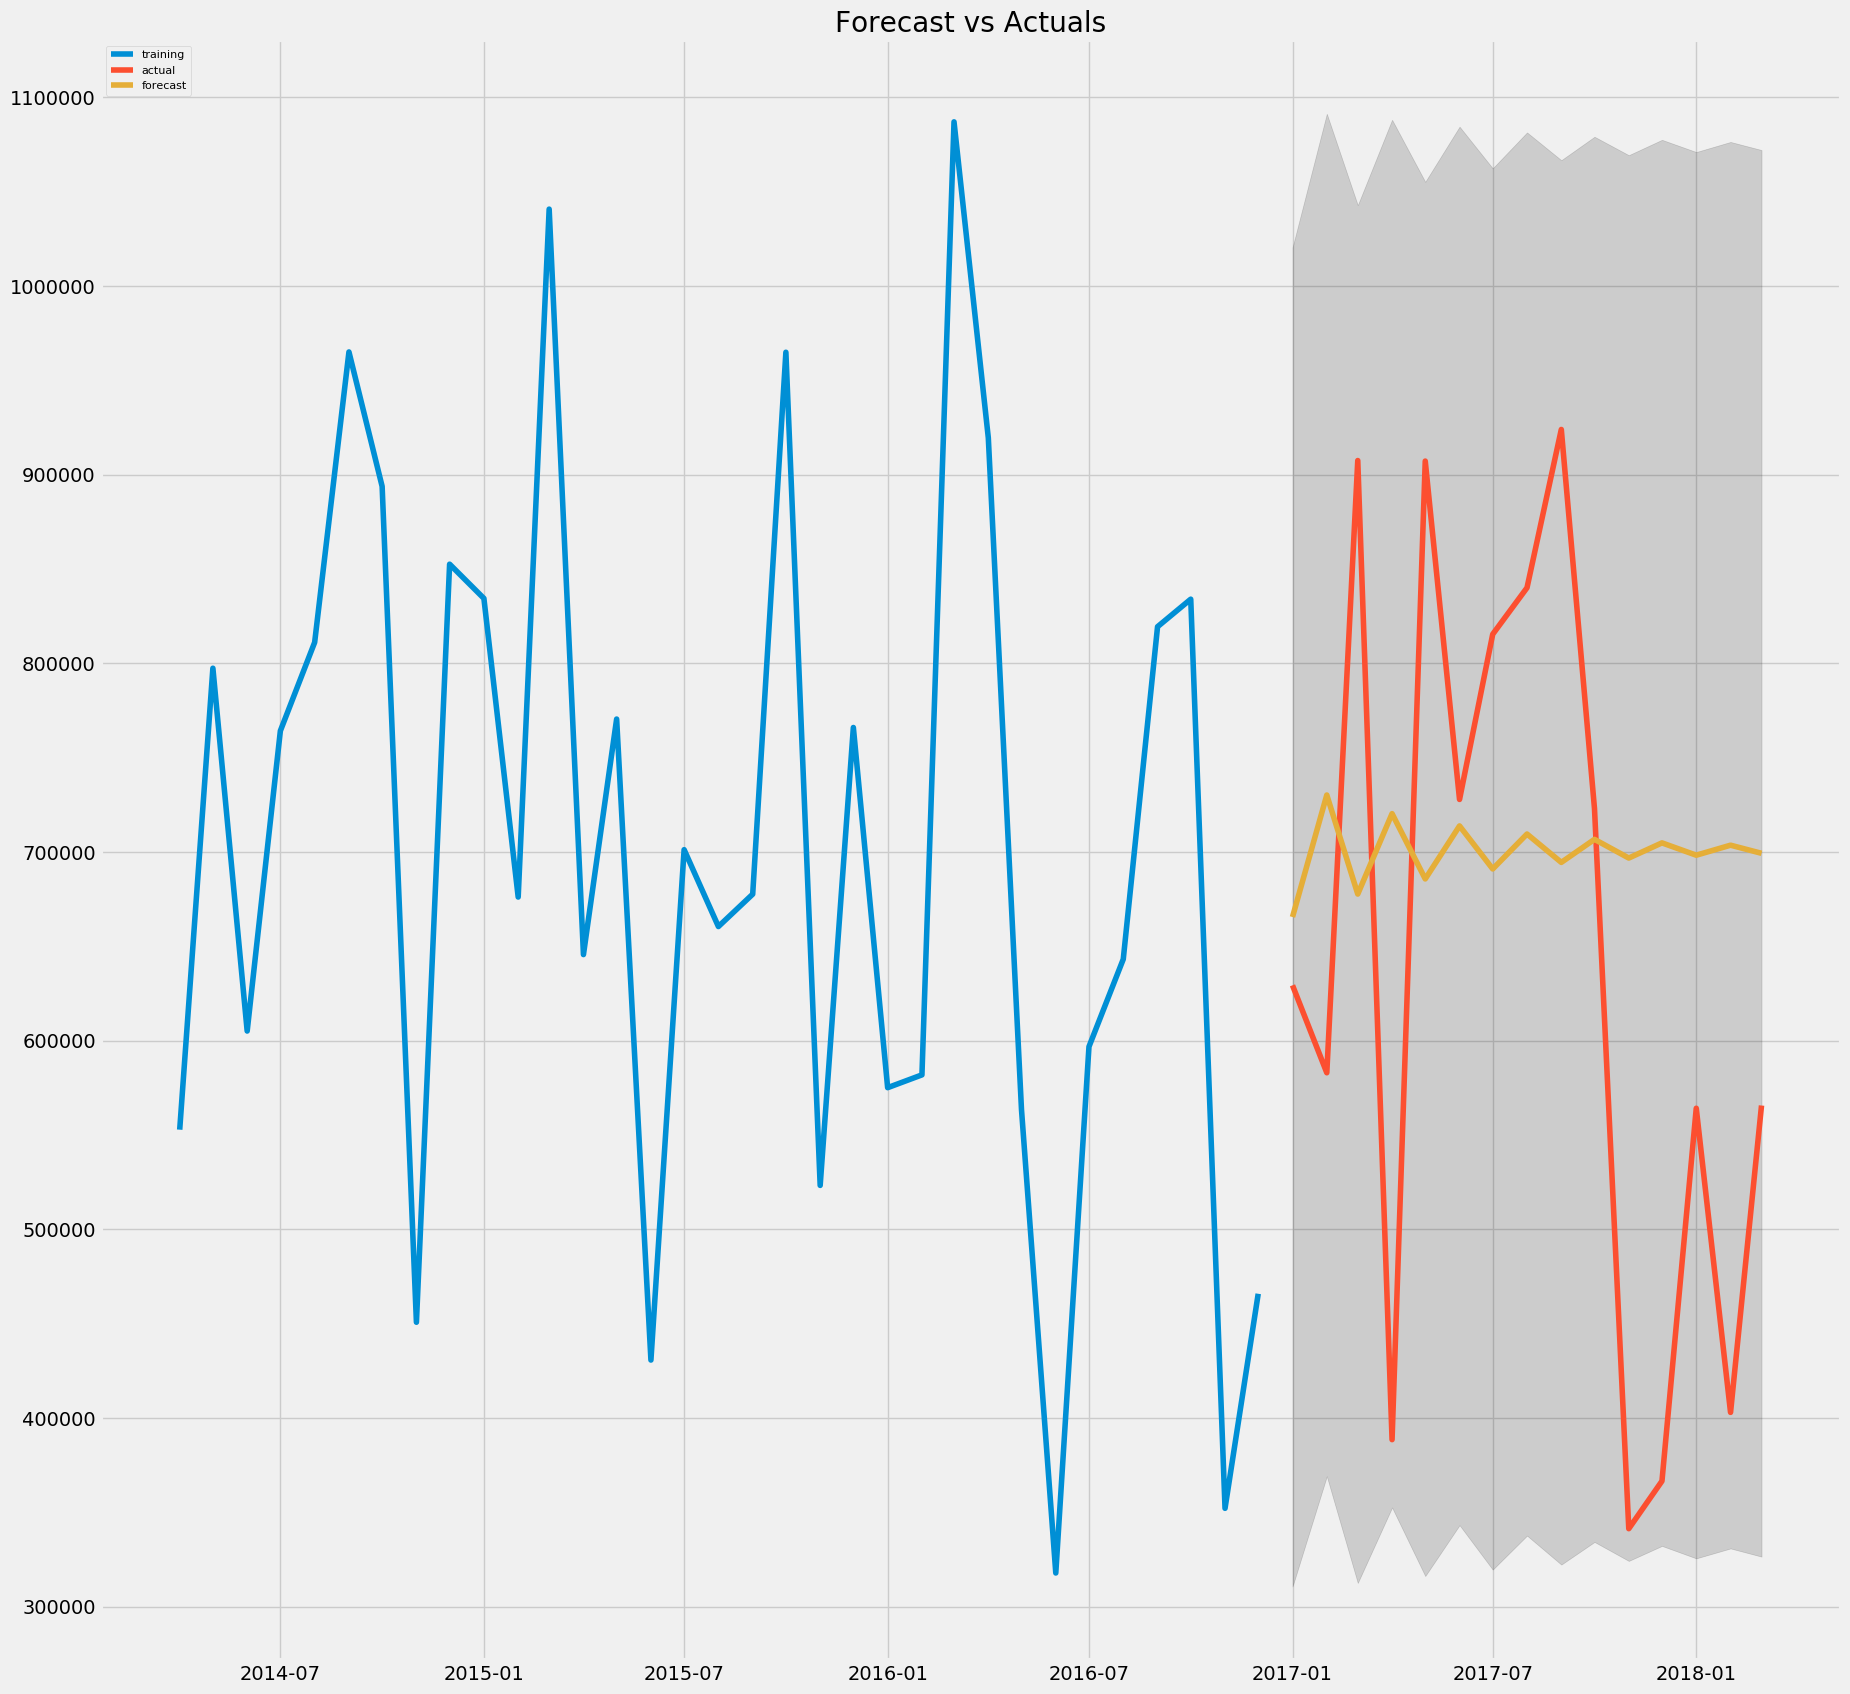

In [138]:
model = ARIMA(train, order=(1,0,1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(20,20), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()